# California Housing Prices Linear Regression Report

## 1.Description of the Problem  
The goal is to analyze the relationship between the median house value in California and three independent variables: median income, population, and number of households.After that to investigate the potential effects of each of these factors on house prices using univariate linear regression models.

## 2.Getting the Data  
The dataset used for this analysis is the [California Housing Prices dataset](https://www.kaggle.com/datasets/camnugent/california-housing-prices)  

To load the data into Pandas DataFrame


In [33]:
import pandas as pd
df = pd.read_csv("/Users/ranjan/Documents/conestoga /Fundamentals of Machine Learning/housing.csv")

## 3. Exploratory Data Analysis (EDA)
### 3.1 Explore Statistics
 The statistics of dataset:

In [34]:
print(df[['median_house_value', 'median_income', 'population', 'households']].describe())

       median_house_value  median_income    population    households
count        20640.000000   20640.000000  20640.000000  20640.000000
mean        206855.816909       3.870671   1425.476744    499.539680
std         115395.615874       1.899822   1132.462122    382.329753
min          14999.000000       0.499900      3.000000      1.000000
25%         119600.000000       2.563400    787.000000    280.000000
50%         179700.000000       3.534800   1166.000000    409.000000
75%         264725.000000       4.743250   1725.000000    605.000000
max         500001.000000      15.000100  35682.000000   6082.000000


An overview of the distribution of variables,including their count,mean, standard deviation,minimum and maximum values are provided.

### 3.2 Scatter Plots
Three scatter plots to visualize the relationships between the median house value and each of the independent variables:

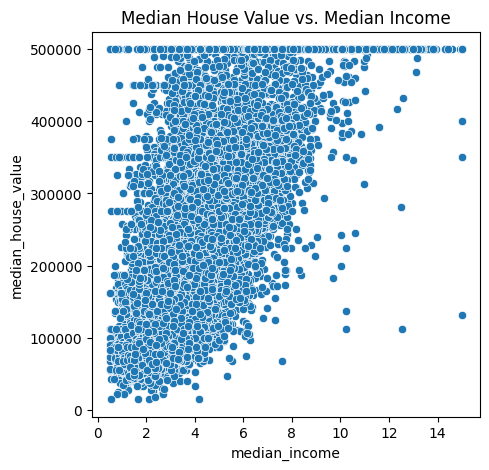

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
sns.scatterplot(data=df,x='median_income',y='median_house_value')
plt.title('Median House Value vs. Median Income')
plt.show()


Median Income vs Median House Value: There appears to be a strong positive correlation. As median income increases, median house value tends to increase as well.

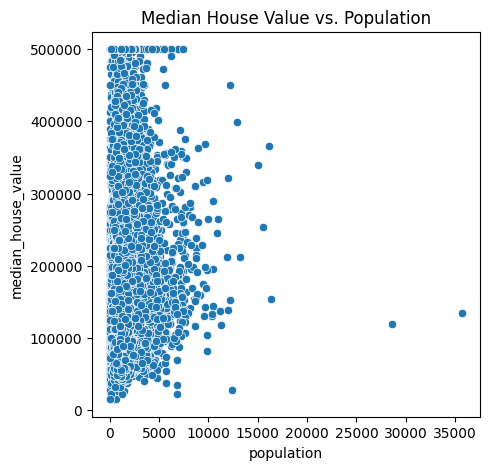

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
sns.scatterplot(data=df,x='population',y='median_house_value',)
plt.title('Median House Value vs. Population')
plt.show()


Population vs Median House Value:The relationship seems weaker and less clear.Though it isn't as strong as the income relationship,there may be a small negative association.

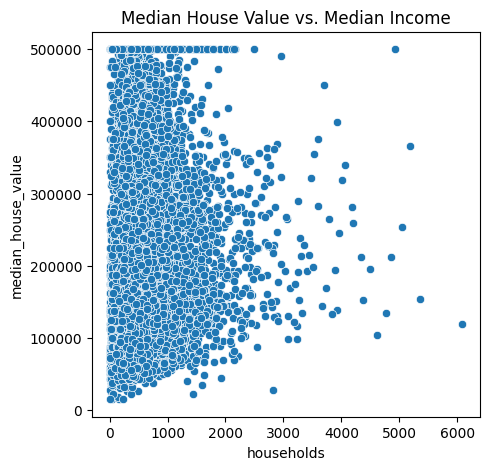

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
sns.scatterplot(data=df, x='households', y='median_house_value')
plt.title('Median House Value vs. Median Income')
plt.show()

Number of Households vs Median House Value: Like population, the relationship is not entirely evident.Though not as significant as the relationship with income, there may be a small positive correlation.

### 3.3 Variable Descriptions
- Median House Value: The target variable, representing the median price of houses in a block group. Values typically range  upto $500,000.
- Median Income: Represents the median income of households in a block group. It's scaled, with values typically ranging from about 0.5 to 15.
- Population: The total number of people living in a block group. Values can range from very low (less than 100) to over 30,000 in some cases.
- Number of Households: The count of households in a block group. This is usually lower than the population and can range from very few to several thousand.

## 4. Running Linear Regressions

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

def fit_and_evaluate(x,y):
    model = LinearRegression()
    model.fit(x,y)
    y_pred = model.predict(x)
    mse = mean_squared_error(y,y_pred)
    mae = mean_absolute_error(y,y_pred)
    return model, mse, mae

y = df['median_house_value'].values
x_income = df['median_income'].values.reshape(-1, 1)
x_population = df['population'].values.reshape(-1, 1)
x_households = df['households'].values.reshape(-1, 1)

model_income,mse_income,mae_income = fit_and_evaluate(x_income,y)
model_population,mse_population,mae_population = fit_and_evaluate(x_population,y)
model_households,mse_households,mae_households = fit_and_evaluate(x_households,y)

print(f"Income Model - MSE: {mse_income}, MAE: {mae_income}")
print(f"Population Model - MSE: {mse_population}, MAE: {mae_population}")
print(f"Households Model - MSE: {mse_households}, MAE: {mae_households}")

Income Model - MSE: 7011311502.929527, MAE: 62625.9337911434
Population Model - MSE: 13307412412.389355, MAE: 91153.82009473181
Households Model - MSE: 13257776904.728535, MAE: 90802.74324318446


### 5. Model Results Table  

| Model                | Intercept    | Slope    | MSE     | MAE      |
|----------------------|--------------|----------|---------|----------|
| Median Income        | 45085.58     | 41793.85 | 7.01e9  | 62625.93 |
| Population           | 210436.26    | -2.51    | 1.33e10 | 91153.82 |
| Number of Households | 196928.58    | 19.87    | 1.33e10 | 90802.74 |


### 6. Regression Line Plots

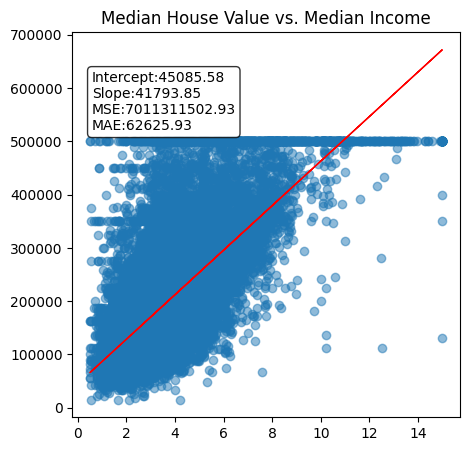

In [39]:
import matplotlib.pyplot as plt

def plot_regression(x, y,model,mse,mae,title):
    plt.figure(figsize=(5, 5)) 
    plt.scatter(x, y,alpha=0.5)
    plt.plot(x, model.predict(x),color='red',linewidth=1)
    plt.title(title)
    plt.text(0.05, 0.9,f'Intercept:{model.intercept_:.2f}\nSlope:{model.coef_[0]:.2f}\nMSE:{mse:.2f}\nMAE:{mae:.2f}', 
             transform=plt.gca().transAxes,verticalalignment='top',bbox=dict(boxstyle='round',facecolor='white',alpha=0.8))
    plt.show()


plot_regression(x_income, y,model_income,mse_income,mae_income,'Median House Value vs. Median Income')

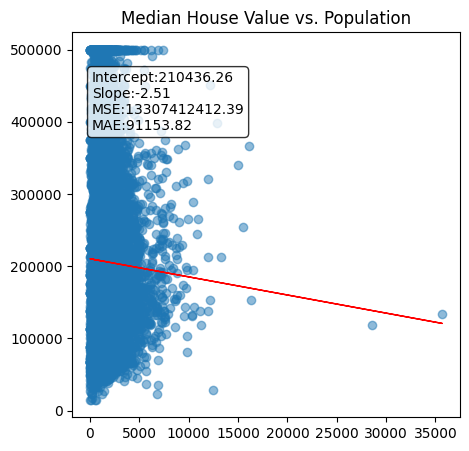

In [40]:

plot_regression(x_population, y,model_population, mse_population, mae_population,'Median House Value vs. Population')

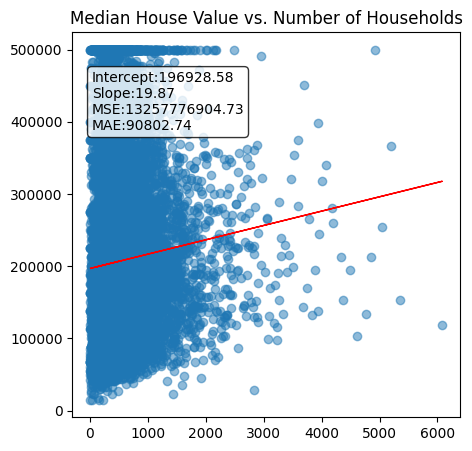

In [41]:

plot_regression(x_households, y,model_households,mse_households,mae_households,'Median House Value vs. Number of Households')

### 7.Conclusion
- Median Income shows the strongest correlation with Median House Value.The positive slope suggests that home values typically rise in accordance with rises in the median income.This model appears to be the strongest predictor because it has the lowest MAE.

- Population and Number of Households show weaker relationships with Median House Value.Their MAE values are larger and their slopes are closer to zero, suggesting that they have less predictive potential.

- The Median Income model explains more of the variance in house prices compared to the other two models, as evidenced by its steeper slope and better fit to the data points in the scatter plot.  

Among these variables, income is the most dependable for predicting house values; the median income model outperforms the other two by a wide margin.

Reference :

[Code](https://github.com/CSCN8010/CSCN8010/tree/main/class_notebooks/linear_regression)